## Install dependencies

In [1]:
# basic installation for machine learning
!pip install numpy -q
!pip install matplotlib -q
!pip install scikit-learn -q
# kneed is library for finding elbow point in K-means
!pip install kneed -q

## Import dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

plt.rcParams["font.size"]=10
plt.style.use("fivethirtyeight")
%matplotlib inline

## Create sample data
See available sample dataset generator in [sklearn datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

In [3]:
RANDOM_SEED = 42
N_SAMPLES = 1000
N_FEATURES = 2
CLUSTER_STD = 2.0

X, y = make_blobs(n_samples=N_SAMPLES,
                  n_features=N_FEATURES,
                  cluster_std=CLUSTER_STD,
                  random_state=RANDOM_SEED)

print(f"Shape of X: {X.shape} and y: {y.shape}")

Shape of X: (1000, 2) and y: (1000,)


## Visualize the generated datasets

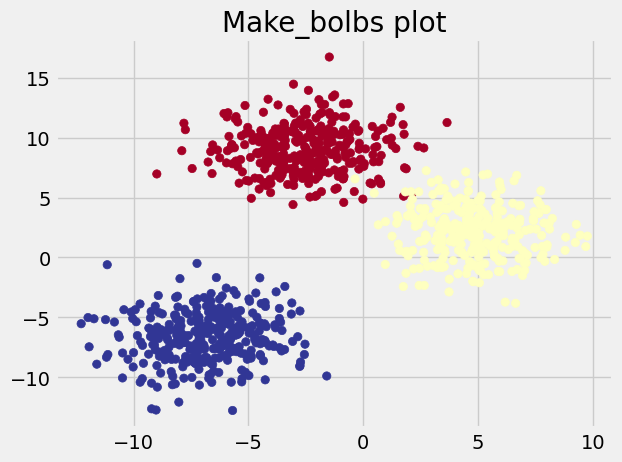

In [4]:
plt.title("Make_bolbs plot")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu')
plt.show()

In [5]:
print(f">>>> Sample features of make_blobs are: \n{X[:5]}")
print(f">>>> Labels of features are: {y[: 5]}")

>>>> Sample features of make_blobs are: 
[[-6.31305145 -7.39791954]
 [-5.39543645 -6.28152443]
 [ 5.75653266  2.12518047]
 [-3.42791942  7.31459739]
 [-3.02838033  6.00800022]]
>>>> Labels of features are: [2 2 1 0 0]


## Preprocessing Datasets
Datasets often contain numerical features measured in different units, such as the price of a house and the area of land. Machine learning algorithms may give more weight to certain features, like price, due to their larger values and variability across different locations.

To ensure that machine learning algorithms treat all features equally during the learning process and avoid introducing bias from the data, it's essential to transform all features to the same scale.

This process of transforming numerical features to the same scale is known as **Feature Scaling**. Various methods exist for implementing feature scaling, which can be explored in the [scikit-learn preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html).

One popular class for feature scaling is the **StandardScaler**, which implements a technique called Standardization. This technique adjusts the values for each numerical feature in the dataset so that the features have a mean of **0** and a standard deviation of **1**.

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features[:5]

array([[-0.92300289, -1.31982492],
       [-0.74607242, -1.15400582],
       [ 1.40420094,  0.09464908],
       [-0.36670449,  0.86543751],
       [-0.28966713,  0.67136754]])

## KMeans Clustering

KMeans clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into clusters. Here are some key parameters that control the behavior of the KMeans algorithm:

- **init**: This parameter controls the initialization technique for the centroids of the clusters. The standard version of KMeans is initialized randomly (`init='random'`). However, `init='k-means++'` is the default setting, which selects initial centroids using the sampling distribution of data points. This technique helps speed up convergence.

- **n_init**: Specifies the number of times the KMeans algorithm runs with different initial seeds. The final result is the best clustering solution with the lowest Sum of Squared Errors (SSE).

- **n_clusters**: Sets the number of clusters (k) for the clustering process. It defines how many clusters we want the algorithm to identify in the dataset.

- **max_iter**: Sets the maximum number of iterations for each initialization of the KMeans algorithm. This parameter controls how many iterations the algorithm will perform before converging to a solution.

You can learn more about the implementation of KMeans in [scikit-learn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

In [7]:
kmeans = KMeans(init="random",
                 n_clusters=5,
                 n_init=5,
                 max_iter=250,
                 random_state=RANDOM_SEED,
                 verbose=0)

In [8]:
# train the model with features data points
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=250, n_clusters=5, n_init=5, random_state=42)

In [9]:
# The lowest sum of the squared error (SSE)
print(f">>>> Lowest SSE after converges: {kmeans.inertia_}")
# Final locations of the centroid
print(f">>>> Center of cluster: \n{kmeans.cluster_centers_}")

>>>> Lowest SSE after converges: 168.04238332823604
>>>> Center of cluster: 
[[-1.3101131  -1.29464753]
 [-0.21959476  1.12181157]
 [ 0.95520054  0.23063249]
 [-0.72497682 -1.12932843]
 [ 1.49069705 -0.00988492]]


## Discrepancy Between `True Labels` and `Predicted Labels`
In KMeans clustering, the assignments of data points to clusters are stored as a 1-dimensional array in the attribute `kmeans.labels_`. It's important to note that the order of cluster labels in this array may not match the order of the true labels assigned to the data points, even though the objects remain members of the same clusters.

This discrepancy in cluster labels is a normal occurrence and is primarily due to the initialization process. In different runs of the KMeans algorithm, the initial assignment of cluster labels may vary. For example, Cluster 0 in one run might be labeled as Cluster 1 in another run, and vice versa. However, this variation in cluster label ordering does not affect the evaluation metrics used to assess the quality of clustering results.

In [10]:
# get class of cluster
kmeans.labels_[:5]

array([3, 3, 4, 1, 1], dtype=int32)

## Plot the cluster

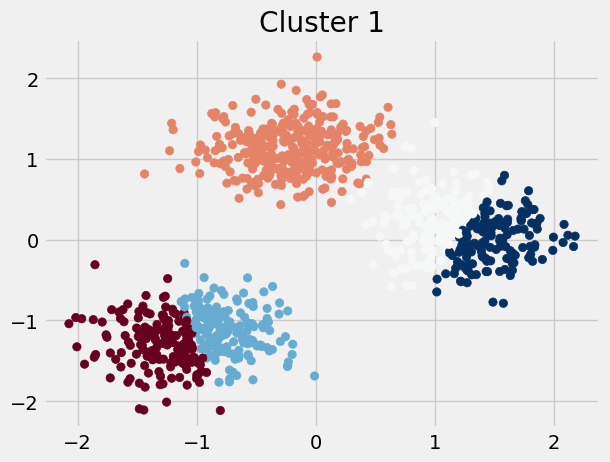

In [11]:
plt.title("Cluster 1")
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap="RdBu")
plt.show()

## Choosing the Appropriate Number of Clusters

When it comes to evaluating the appropriate number of clusters, two primary methods are commonly employed:

1. **Elbow Method**
2. **Silhouette Coefficient**

Rather than favoring one over the other, these methods complement each other.

To utilize the **elbow method**, multiple iterations of k-means are executed, with k incremented in each iteration, and the Sum of Squared Errors (SSE) is recorded. As the number of clusters (k) increases, SSE typically continues to decrease. This phenomenon occurs because with more centroids, the distance from each point to its closest centroid decreases.

In [12]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 5,
    "max_iter": 250,
    "random_state": RANDOM_SEED
}

sse=[]
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

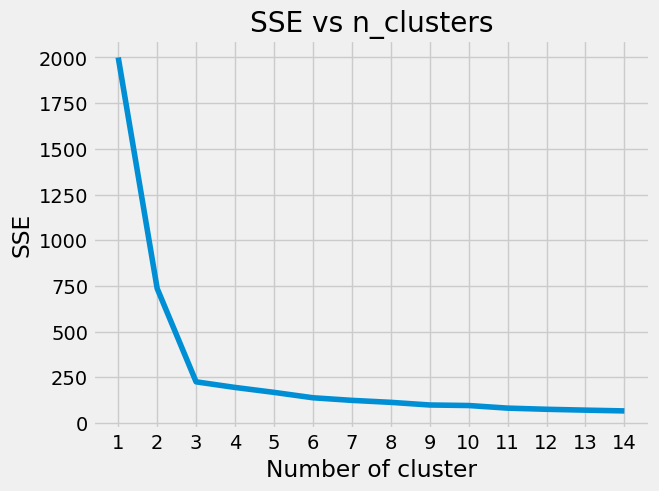

In [13]:
plt.title("SSE vs n_clusters")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Elbow Point
The elbow point refers to a pivotal moment on the SSE (Sum of Squared Errors) curve where the curve starts to bend. It is considered a significant trade-off between error and the number of clusters. In this specific example, the elbow is identified at x=3.

Identifying the elbow point can be challenging, especially with complex data samples. To identify the elbow point programmatically, the `kneed` Python package can be utilized. For further information about the `kneed` Python package, visit [kneed GitHub repository](https://github.com/arvkevi/kneed).

In [14]:
from kneed import KneeLocator

In [15]:
knee_elbow = KneeLocator(range(1, 15), sse, 
                         curve="convex", 
                         direction="decreasing")
print("The elbow point is: ", knee_elbow.elbow)

The elbow point is:  3


## Silhouette Coefficient
The silhouette coefficient serves as a metric for measuring both the cohesion and separation of clusters. It evaluates how well a data point fits into its assigned cluster by considering two main factors:

1. The proximity of the data point to other points within the same cluster.
2. The distance between the data point and points in other clusters.

Silhouette coefficient values fall within the range of -1 to 1. A higher value indicates that the samples are closer to their clusters than they are to other clusters. In the implementation provided by scikit-learn, the average silhouette coefficient of all samples is computed and summarized into a single score. It's important to note that the `silhouette_score()` function requires a minimum of two clusters; otherwise, it will raise an exception.

To compute the silhouette coefficient, we iterate through different values of k (number of clusters). Instead of calculating the Sum of Squared Errors (SSE), we compute the silhouette coefficient for each value of k.

In [16]:
from sklearn.metrics import silhouette_score

# create a list for storing silhouette_score for all k
silhouttte_coeff = []

# k must start from 2
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouttte_coeff.append(score)

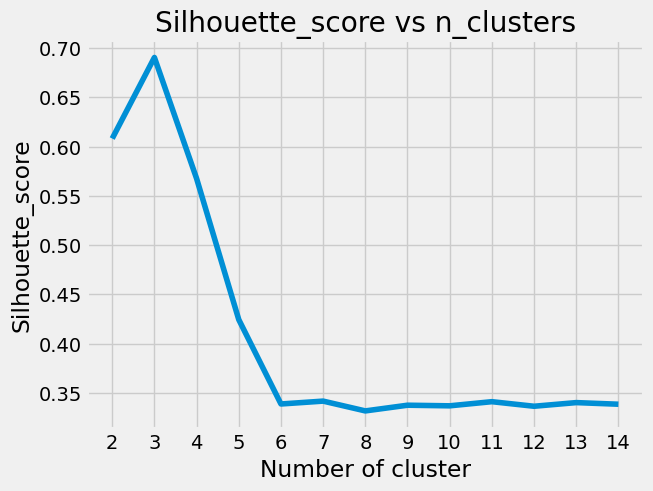

In [17]:
plt.style.use("fivethirtyeight")
plt.title("Silhouette_score vs n_clusters")
plt.plot(range(2, 15), silhouttte_coeff)
plt.xticks(range(2, 15))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette_score")
plt.show()

## Final choice of Number of clusters
Plotting the average silhouette scores for each k shows that the best choice for k is 3 since it has the maximum value.

Our decision on the number of clusters to use should be guided by a combination of domain knowledge and evaluation metrics.

## Density-Based Clustering
**Density-based clustering** is a methodology that determines cluster assignments based on the density of data points within a region. Clusters are formed where there are high densities of data points separated by regions of lower density.

This approach stands out from other clustering techniques because it doesn't require the user to specify the number of clusters beforehand. Instead, it relies on a distance-based parameter that serves as a tunable threshold. This threshold dictates how close points must be to each other to be considered members of the same cluster.

Examples of density-based clustering algorithms include Density-Based Spatial Clustering of Applications with Noise (DBSCAN) and Ordering Points To Identify the Clustering Structure (OPTICS).

The strengths of density-based clustering methods are as follows:

1. They are proficient at identifying clusters with nonspherical shapes.
2. They exhibit resilience to outliers.

However, density-based clustering methods also have their weaknesses:

1. They are not well suited for clustering in high-dimensional spaces.
2. They encounter difficulty in identifying clusters with varying densities.

In [18]:
# initiate the dbscan method
dbscan = DBSCAN(eps=0.2, min_samples=6)
dbscan.fit(scaled_features)

DBSCAN(eps=0.2, min_samples=6)

In [19]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2])

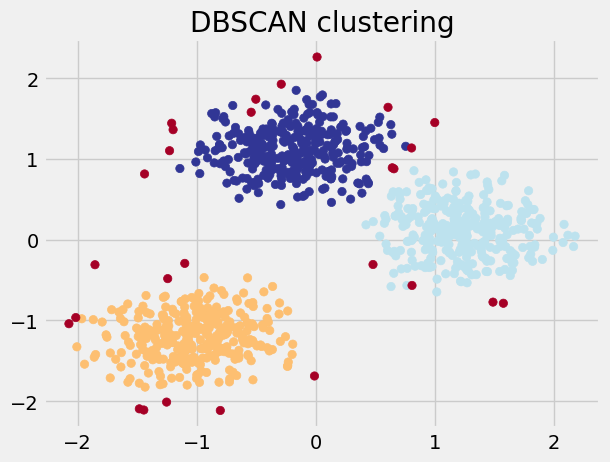

In [20]:
plt.title("DBSCAN clustering")
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=dbscan.labels_, cmap="RdYlBu")
plt.show()

In [21]:
dbscan_silhouette  = silhouette_score(scaled_features, dbscan.labels_)
dbscan_silhouette

0.6505996395153893